<a href="https://colab.research.google.com/github/guilhermelaviola/FinanceWithDataScience/blob/main/ProfitPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
# Importing the dataset and displaying the first 10 rows:
data = pd.read_csv('Companies.csv')
print(data.head(10))

   R&D Spend  Administration  Marketing Spend        Country    Profit
0   14039.84        26012.05         43588.34        Germany  76032.49
1   26951.48        92166.89         81921.68         France  92265.57
2   11724.17         3634.69         52136.66          China    261.01
3   91606.49         1796.38         49520.86  United States  36839.86
4   43833.52        84397.23         26357.24         Brazil  75368.41
5   84308.54         2082.37           320.21         France  11962.24
6   15720.84        15620.78         32638.21         Brazil  23733.86
7   92113.99        74072.66         60183.61  United States  29139.65
8   47691.91        90371.23         63730.46          China  68860.64
9   21592.21        38600.33         57410.76          Japan  83477.52


In [11]:
# Summarizing the statistics of the dataset:
print(data.describe())

          R&D Spend  Administration  Marketing Spend        Profit
count   1000.000000     1000.000000      1000.000000   1000.000000
mean   49165.500910    48626.859410     50232.517200  50311.437150
std    28684.775983    28343.829508     29085.346908  29029.989398
min       37.420000      434.100000       122.140000     54.430000
25%    22510.780000    23642.957500     24700.907500  25597.265000
50%    49368.395000    48611.440000     51345.220000  48939.315000
75%    73324.942500    73234.112500     75000.485000  76265.247500
max    99933.310000    99945.310000     99826.630000  99956.010000


<ipython-input-12-d3251df18d67>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


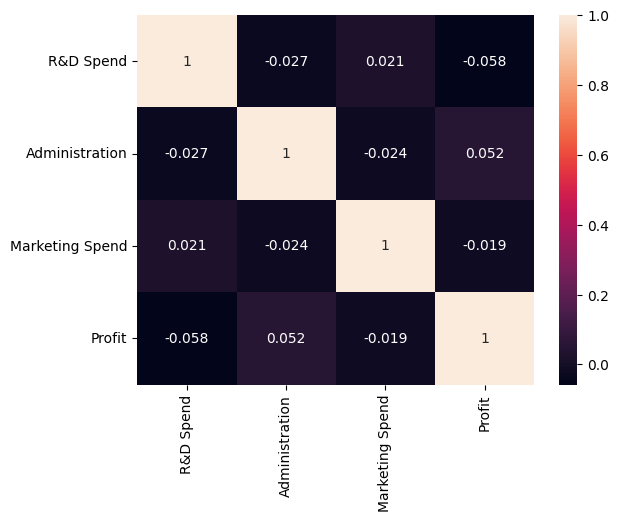

In [12]:
# Vizualising the correlation between the features:
sns.heatmap(data.corr(), annot = True)
plt.show()

In [14]:
# Preparing the data to fit into the Linear Regression profit prediction model:
x = data[['R&D Spend', 'Administration', 'Marketing Spend']]
y = data['Profit']

x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [17]:
# Training the Linear Regression model on the data and displaying the predicted values:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
data = pd.DataFrame(data = {'Predicted Profit' : y_pred.flatten()})
print(data.head(10))

   Predicted Profit
0      53786.168753
1      49360.318046
2      53368.738246
3      50417.170378
4      52540.110081
5      46744.950474
6      47211.699821
7      47418.367103
8      53302.114510
9      48678.301066
